In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

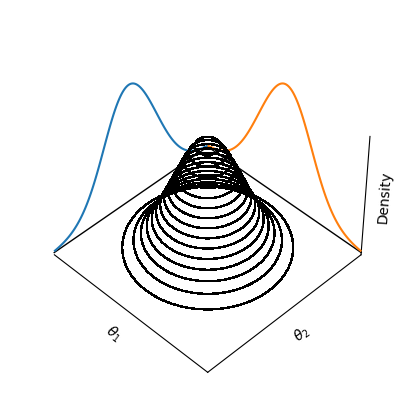

In [363]:
# del multivariate_gaussian
N = 500
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

pos = np.dstack([X,Y])


mean = np.array([0., 0.])
cov = np.array([[1., 0.], [0., 1.]])
Z = multivariate_normal.pdf(pos, mean, cov)


ax = plt.figure(figsize=(5,5)).add_subplot(projection='3d')
# ax.plot_wireframe(X, Y, Z, rstride=8, cstride=8, linewidths=5, antialiased=True, lw=0.5, alpha=0.75, color='black', label='marginal')
# ax.plot_surface(X, Y, Z, rstride=8, cstride=8, linewidths=0, antialiased=False, lw=0.5, cmap='bone')#, label='marginal')
ax.contour(X, Y, Z, antialiased=False, colors='k', linewidths=1, levels=15, vmin=0.01, vmax=0.15)
ax.contour(X, Y, Z, zdir='x', offset=-3, colors='C0', alpha=1, antialiased=True, levels=0)
ax.contour(X, Y, Z, zdir='y', offset=3, colors='C1', alpha=1, antialiased=True, levels=0)

ax.plot([-3,3],[3,3],[0,0], lw=1, c='k')
ax.plot([-3,-3],[-3,3],[0,0], lw=1, c='k')
# ax.axhline(0)

ax.set_xlabel(r"$\theta_1$", labelpad=-7)
ax.set_ylabel(r"$\theta_2$", labelpad=-7)
ax.set_zlabel("Density", labelpad=-12)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# ax.legend()

ax.view_init(elev=45, azim=-45, roll=0)
ax.set_box_aspect((4,4,3), zoom=0.9)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

plt.savefig("marginalization_vis.pdf") 

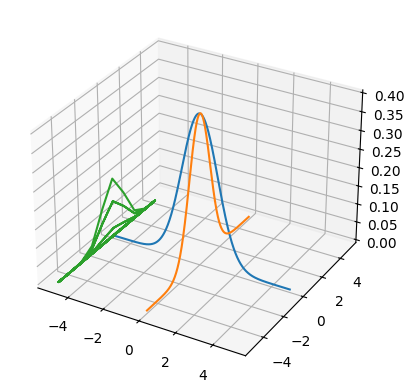

In [51]:
ax = plt.figure().add_subplot(projection='3d')

marginal_draws = np.linspace(-5, 5, 1000)
marginal = multivariate_normal.pdf(marginal_draws, mean=0, cov=1)


mean = np.array([0., 0.])
cov = np.array([[1., 0.], [0., 1.]])
joint_draws = np.mgrid[-5:5, -5:5]
joint = multivariate_normal(mean, cov)
# joint = multivariate_normal.pdf(joint_draws, mean=mean, cov=cov)

# y = np.sin(x * 2 * np.pi) / 2 + 0.5
# z = np.np.linspace(0, 1, 100)
# ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

ax.plot(marginal_draws, 0, zs=marginal)
ax.plot(0, marginal_draws, zs=marginal)
# print(joint_draws[0][0])
# print()
# print(joint_draws[1][0])

# print(joint.pdf(np.dstack(joint_draws)))
ax.plot(joint_draws[0][0], joint_draws[1][0], zs=joint.pdf(np.dstack(joint_draws)))
# ax.plot(joint_draws, draws, zs=marginal)

Text(0.5, 0.5, '$x_2$')

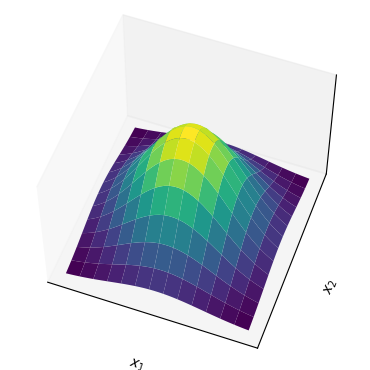

In [8]:
# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0.0], [0.0,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

# ax2 = fig.add_subplot(2,1,2,projection='3d')
# ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
# ax2.view_init(90, 270)

# ax2.grid(False)
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_zticks([])
# ax2.set_xlabel(r'$x_1$')
# ax2.set_ylabel(r'$x_2$')

# plt.show()

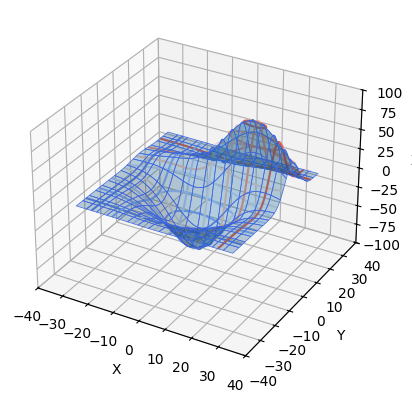

In [293]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()